In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
X_train = pd.read_csv('x_train.csv')
X_test = pd.read_csv('x_test.csv')

In [4]:
X_train.shape, X_test.shape

((1525, 7), (382, 7))

In [5]:
X_train

,city,zipcode,bathrooms,bedrooms,area,year,price
0,0.458299,-0.155084,1.339383,-0.019637,0.290340,-0.376494,7.803843
1,-0.443515,-1.600115,0.791788,0.857772,-0.386938,0.186894,7.696213
2,1.360114,1.771624,0.791788,0.857772,0.981316,0.403203,8.629629
3,-0.443515,-0.155084,1.339383,1.480304,1.068127,0.403203,7.955074
4,-0.443515,-2.081792,-0.909197,-0.019637,0.231976,0.892801,7.824046
...,...,...,...,...,...,...,...
1520,1.360114,1.771624,-0.909197,-0.019637,0.231976,0.403203,8.318742
1521,-0.443515,-0.155084,0.085816,-0.019637,-0.160267,-0.521272,7.244228
1522,0.458299,-0.155084,-0.909197,-1.519579,-1.174869,0.232821,7.313220
1523,1.360114,2.253301,-0.909197,0.217293,0.109323,0.403203,7.762171


In [6]:
X_test

,city,zipcode,bathrooms,bedrooms,area,year,price
0,-0.443515,-0.155084,0.791788,-0.019637,-0.055301,-1.965715,7.600902
1,0.458299,-0.155084,0.791788,-0.019637,0.177508,-1.965715,7.937375
2,-0.443515,-0.155084,0.085816,-1.519579,-0.472273,0.403203,7.783224
3,-0.443515,-0.636761,-0.909197,-1.519579,-0.822644,0.403203,7.374629
4,-1.345330,-0.155084,-0.909197,-1.519579,-1.887744,-0.559850,6.745236
...,...,...,...,...,...,...,...
377,0.458299,-0.155084,0.791788,1.480304,1.330956,0.442837,8.070906
378,-0.443515,0.326593,0.791788,-0.019637,0.423946,-0.342456,8.055158
379,1.360114,0.808270,-0.909197,0.857772,0.501249,0.573584,8.255828
380,1.360114,1.771624,-0.909197,-1.519579,0.109323,0.403203,8.160518


In [7]:
# capture the target
y_train = X_train['price']
y_test = X_test['price']
print(y_train)

0       7.803843
1       7.696213
2       8.629629
3       7.955074
4       7.824046
          ...   
1520    8.318742
1521    7.244228
1522    7.313220
1523    7.762171
1524    8.330864
Name: price, Length: 1525, dtype: float64


In [8]:
X_train = X_train.drop(columns=['price'])
X_test = X_test.drop(columns=['price'])

# Model Building

### Plan:

In [9]:

# Multiple linear regression
from sklearn.linear_model import LinearRegression

# Ridge regression
from sklearn.linear_model import Ridge

# Lasso regression
from sklearn.linear_model import Lasso

# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# SVR
from sklearn.svm import SVR

# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

# Random Forest regression
from sklearn.ensemble import RandomForestRegressor

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

### Multiple Linear Regression

In [10]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = lm.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lm.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 411280
train rmse: 641
train r2: 0.6726833560560685

test mse: 488845
test rmse: 699
test r2: 0.6609573882947357



Text(0.5, 1.0, 'Evaluation of Linear Regression Predictions')

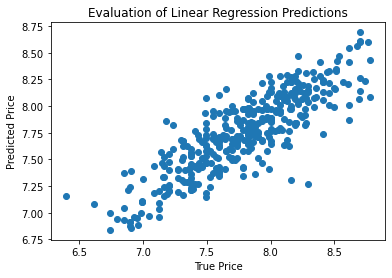

In [12]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, lm.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Linear Regression Predictions')

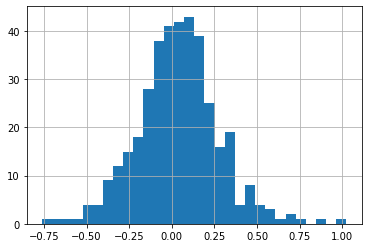

In [13]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - lm.predict(X_test)
errors.hist(bins=30)

Text(0.5, 1.0, 'Feature Importance')

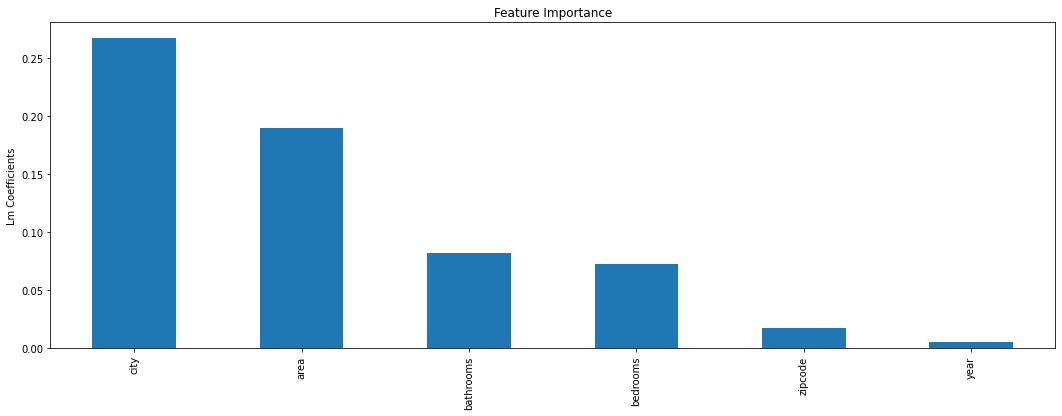

In [14]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lm.coef_.ravel()))
importance.index = ['city', 'zipcode', 'bathrooms', 'bedrooms', 'area', 'year']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lm Coefficients')
plt.title('Feature Importance')

### Regularization: Lasso Regression

In [15]:
l1 = Lasso(alpha=0.005, random_state=0)

l1.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [16]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = l1.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = l1.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 414118
train rmse: 643
train r2: 0.6704244126197878

test mse: 495973
test rmse: 704
test r2: 0.656013826121537



Text(0.5, 1.0, 'Evaluation of Lasso Regression Predictions')

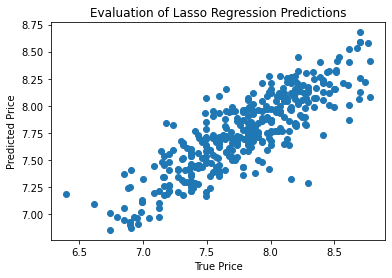

In [17]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, l1.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Lasso Regression Predictions')

### Regularization: Ridge Regression

In [18]:
l2 = Ridge(alpha=0.005, random_state=0)
l2.fit(X_train, y_train)

Ridge(alpha=0.005, random_state=0)

In [19]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = l2.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = l2.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 411280
train rmse: 641
train r2: 0.6726833763462601

test mse: 488846
test rmse: 699
test r2: 0.6609569241656668



Text(0.5, 1.0, 'Evaluation of Rdige Regression Predictions')

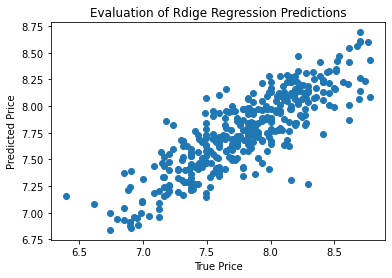

In [20]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, l2.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Rdige Regression Predictions')

### Support Vector Regression (SVR)

In [21]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [22]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = svr.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = svr.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 292804
train rmse: 541
train r2: 0.7669719635174365

test mse: 429965
test rmse: 655
test r2: 0.7017944385482556



Text(0.5, 1.0, 'Evaluation of SVR Predictions')

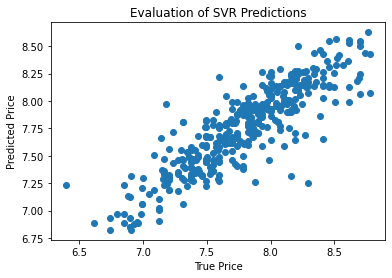

In [23]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, svr.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of SVR Predictions')

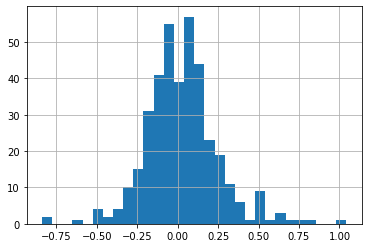

In [24]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - svr.predict(X_test)
errors.hist(bins=30)

### Decision Tree Regression

In [25]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = dt.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = dt.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 25861
train rmse: 160
train r2: 0.9794181029263175

test mse: 454145
test rmse: 673
test r2: 0.6850241089221445



Text(0.5, 1.0, 'Evaluation of Decision Tree Regression Predictions')

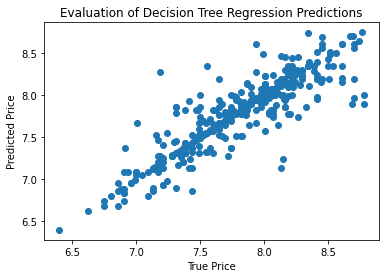

In [27]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, dt.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Decision Tree Regression Predictions')

### Random Forest

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = rf.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = rf.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 61470
train rmse: 247
train r2: 0.9510785327817023

test mse: 303797
test rmse: 551
test r2: 0.7892992491601716



Text(0.5, 1.0, 'Evaluation of Random Forest Regression Predictions')

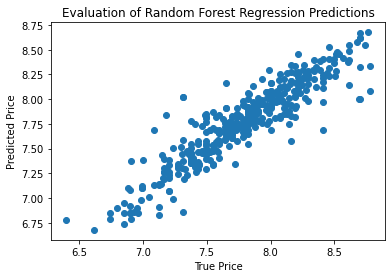

In [30]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, rf.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Random Forest Regression Predictions')

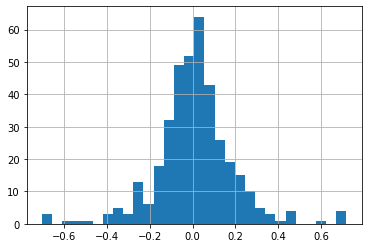

In [31]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - rf.predict(X_test)
errors.hist(bins=30)

### GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','rmse'), 'max_features':('auto','sqrt','log2')}

In [33]:
gs = GridSearchCV(rf,parameters,scoring='neg_root_mean_squared_error',cv=3, )
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'rmse'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_root_mean_squared_error')

In [34]:
gs.best_params_

{'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 200}

In [35]:
gs.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=200)

In [36]:
gs.best_score_

-0.1869799434790885